In [1]:
from brian2 import *
%matplotlib inline

In [2]:
def visualise_connectivity(S):
    Ns = len(S.source)
    Nt = len(S.target)
    figure(figsize=(30, 12))
    subplot(121)
    plot(zeros(Ns), arange(Ns), 'ok', ms=1)
    plot(ones(Nt), arange(Nt), 'ok', ms=1)
    for i, j in zip(S.i, S.j):
        plot([0, 1], [i, j], '-k')
    xticks([0, 1], ['Source', 'Target'])
    ylabel('Neuron index')
    xlim(-0.1, 1.1)
    ylim(-1, max(Ns, Nt))
    subplot(122)
    plot(S.i, S.j, 'ok')
    xlim(-1, Ns)
    ylim(-1, Nt)
    xlabel('Source neuron index')
    ylabel('Target neuron index')

In [11]:
start_scope()
# Params
eqs = '''
dv/dt = (0.04*v**2 + 5*v + 140 - u + I) : 1
du/dt = a * (b*v - u) : 1
dg/dt = -g/tau : 1
'''

t = 5*ms
tau = 1*ms

s = 10
a = 0.0275
b = 0.490

I = 0
g = 0
v = 0
u = 0
g = 1

# TODO: add uniform dist. - bio. plaus.
c = -65
d = 8

n = 2
N = 20

# P = PoissonGroup(n, rates=1/tau)
# S_P = Synapses(P, G, on_pre='v += s')
# S_P.connect()

G = NeuronGroup(N, eqs, threshold='v>30', reset='v=c, u=u+d, g=1', 
                method='euler')
# TODO: verify with one neuron!

P = n/N
N_excit = int(0.8 * N)
print('N_excit', N_excit)
S = Synapses(G, G, 'w : 1')
S.connect(condition='i!=j', p=P)
# S.w = 's*g'
S.w['k<N_excit'] = 's*g'
# S.w['k>=N_excit'] = '-s*g'

visualise_connectivity(S)
suptitle('p = '+str(P))

N_excit 16


WARNING    "g" is an internal variable of group "synapses_4", but also exists in the run namespace with the value 1. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


KeyError: 'The identifier "k" could not be resolved.'

In [13]:
M = SpikeMonitor(G)

output_rates = []
store()
for i in range(0, 10):
    restore()
    run(1*second)
    output_rates.append(M.num_spikes/(N*second))

BrianObjectException: Original error and traceback:
Traceback (most recent call last):
  File "/Users/william/.venvs/brian2/lib/python3.6/site-packages/brian2/core/network.py", line 841, in before_run
    obj.before_run(run_namespace)
  File "/Users/william/.venvs/brian2/lib/python3.6/site-packages/brian2/groups/neurongroup.py", line 811, in before_run
    self.equations.check_units(self, run_namespace=run_namespace)
  File "/Users/william/.venvs/brian2/lib/python3.6/site-packages/brian2/equations/equations.py", line 945, in check_units
    user_identifiers=external)  # all variables are user defined
  File "/Users/william/.venvs/brian2/lib/python3.6/site-packages/brian2/groups/group.py", line 739, in resolve_all
    run_namespace=run_namespace)
  File "/Users/william/.venvs/brian2/lib/python3.6/site-packages/brian2/groups/group.py", line 696, in _resolve
    return self._resolve_external(identifier, run_namespace=run_namespace)
  File "/Users/william/.venvs/brian2/lib/python3.6/site-packages/brian2/groups/group.py", line 820, in _resolve_external
    raise KeyError(error_msg)
KeyError: 'The identifier "I" could not be resolved.'

Error encountered with object named "neurongroup".
Object was created here (most recent call only, full details in debug log):
  File "<ipython-input-5-41a6cfe6d8c9>", line 24, in <module>
    method='euler')

An error occurred when preparing an object. KeyError: 'The identifier "I" could not be resolved.'
(See above for original error message and traceback.)

In [ ]:
neuron = G[0]
statemon = StateMonitor(neuron, 'v', record=True)
spikemon = SpikeMonitor(neuron, variables='v')

# 50 ms
figure(figsize=(9, 4))
for l in range(5):
    axvline(l*10, ls='--', c='k')
axhline(El/mV, ls='-', c='lightgray', lw=3)
plot(statemon.t/ms, statemon.v.T/mV, '-')
xlabel('Time (ms)')
ylabel('v (mV)');

In [ ]:
M = SpikeMonitor(G)
# create function/process where a random neuron is excited by 100 micro-Ampere per ms, and timestep

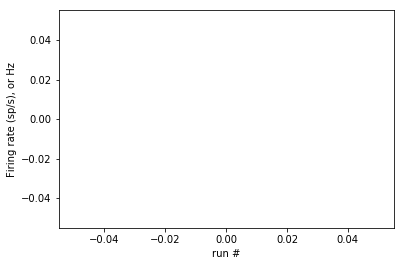

In [8]:
# print("firing rates: ", output_rates)
# plot(tau_range/ms, output_rates)
# xlabel(r'$\tau$ (ms)')
plot(output_rates)
xlabel('run #')
ylabel('Firing rate (sp/s), or Hz');

In [10]:
# create spike plots

In [12]:
plot(spikemon.t/ms, spikemon.i, '.k')
xlabel('Time (ms)')
ylabel('Neuron index');

NameError: name 'spikemon' is not defined

In [ ]:
_ = hist(spikemon.t/ms, 100, histtype='stepfilled', facecolor='k', weights=ones(len(spikemon))/(N*defaultclock.dt))
xlabel('Time (ms)')
ylabel('Instantaneous firing rate (sp/s)');